In [10]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import category_encoders as ce
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv(r"C:\Users\Jonat\dat-11-15\ClassMaterial\Unit3\data\ks2.csv", parse_dates = ['deadline', 'launched'])

df['month'] = df['launched'].dt.year
df['year'] = df['launched'].dt.year
df['duration'] = (df['deadline'] - df['launched']).dt.days

df.drop(['deadline', 'launched'], axis = 1, inplace = True)

In [21]:
pipe = make_pipeline(ce.TargetEncoder(min_samples_leaf = 30), XGBClassifier(eval_metric = 'logloss'))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis = 1), df['state'], 
                                                    stratify = df['state'],
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    stratify = y_train,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [23]:
pipe.fit(X_train, y_train).score(X_val, y_val)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7033050461424257

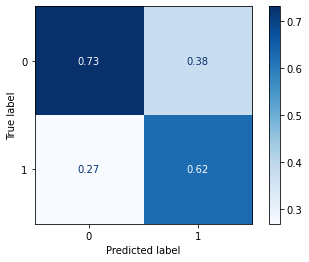

In [34]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

plot_confusion_matrix(pipe, X_val, y_val,
                                 cmap=plt.cm.Blues,
                                 normalize='pred');

In [28]:
confusion_matrix(y_val, pipe.predict(X_val), normalize = 'true')

array([[0.84553383, 0.15446617],
       [0.54780012, 0.45219988]])

In [30]:
print(classification_report(y_val, pipe.predict(X_val)))

              precision    recall  f1-score   support

           0       0.73      0.85      0.78     37840
           1       0.62      0.45      0.52     21433

    accuracy                           0.70     59273
   macro avg       0.68      0.65      0.65     59273
weighted avg       0.69      0.70      0.69     59273



In [35]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_val, pipe.predict(X_val))

0.524317013794969

In [39]:
pipe[-1].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss'}

In [42]:
wght = 1 / y_train.mean()

In [43]:
pipe[-1].set_params(scale_pos_weight = wght)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2.765478467783325, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
pipe.fit(X_train, y_train)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['name', 'category', 'main_category',
                                     'currency', 'country'],
                               min_samples_leaf=30)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1,
                               s

In [46]:
f1_score(y_val, pipe.predict(X_val))

0.6136044524893002